In [5]:
import numpy as np
from scipy.optimize import minimize

# Simulated dataset: 1 = Spam, 0 = Not Spam
emails = np.array([1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0])

# we take Negative Log-Likelihood function because miniminze will find the minimum value and -log means highest likelihood
def neg_log_likelihood(p):
    if p <= 0 or p >= 1:  # p must be between 0 and 1
        return np.inf
    return -np.sum(emails * np.log(p) + (1 - emails) * np.log(1 - p))

# Initial guess for p
initial_guess = np.mean(emails)

# MLE
result = minimize(neg_log_likelihood, x0=initial_guess, method="L-BFGS-B", bounds=[(0.01, 0.99)])

# estimated p
p_mle = result.x[0]

print(f"MLE Estimate for p (Spam Probability): {p_mle:.4f}")


MLE Estimate for p (Spam Probability): 0.6000


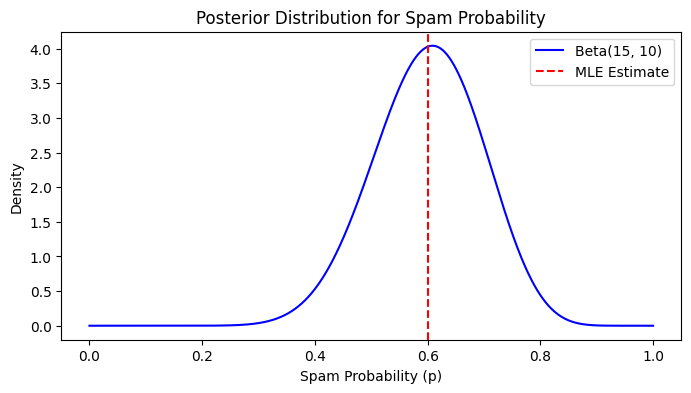

In [11]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Prior: Most importatnt assume spam probability follows Beta(2,2)
alpha_prior, beta_prior = 2, 2

# here we will pdate posterior using observed data
alpha_post = alpha_prior + np.sum(emails)
beta_post = beta_prior + len(emails) - np.sum(emails)

# posterior Distribution
x = np.linspace(0, 1, 1000)
posterior_dist = stats.beta.pdf(x, alpha_post, beta_post)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(x, posterior_dist, label=f'Beta({alpha_post}, {beta_post})', color='blue')
plt.axvline(p_mle, color='red', linestyle="--", label="MLE Estimate")
plt.xlabel("Spam Probability (p)")
plt.ylabel("Density")
plt.title("Posterior Distribution for Spam Probability")
plt.legend()
plt.show()


MLE Estimated Intercept: 2.00, Slope: 2.93
MAP Estimated Intercept: 1.96, Slope: 2.83


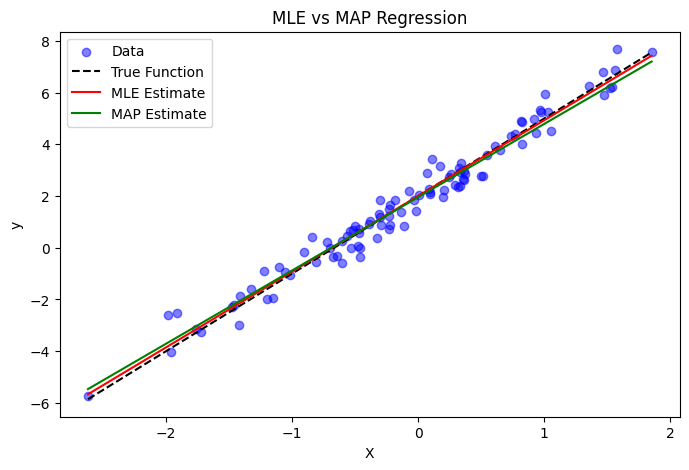

In [2]:
#this is another program to check MLE/MAP with 1 dataset
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# always set the seed to maintain consistency acorss
np.random.seed(42)

# Generating synthetic dataset
n_samples = 100  
X = np.random.randn(n_samples, 1)
true_slope = 3.0
true_intercept = 2.0
y = true_intercept + true_slope * X.squeeze() + np.random.normal(0, 0.5, n_samples)  
def neg_log_likelihood(params, X, y):
    intercept, slope = params
    y_pred = intercept + slope * X.squeeze()
    residuals = y - y_pred
    return 0.5 * np.sum(residuals**2)

#above we have taken the value of likelihood as sum  0.5 * np.sum(residuals**2)
#please wathc https://www.youtube.com/watch?v=Dn6b9fCIUpM this video, it gives a really good insgiht

def log_prior(params):
    intercept, slope = params
    mean_prior = [1.0, 1.0] 
    #most important part, deciding prior
    std_dev = 0.5  # this will be our Confidence level (small std → strong prior)
    
    # Gaussian prior
    return -0.5 * np.sum(((params - mean_prior) / std_dev) ** 2)


def neg_log_posterior(params, X, y):
    return -log_prior(params) + neg_log_likelihood(params, X, y)


# Initial guess
initial_guess = [0, 0]

#  MLE (we are not ocnsidering  prior here)
mle_result = minimize(neg_log_likelihood, initial_guess, args=(X, y), method="L-BFGS-B")
mle_params = mle_result.x

# MAP/BI (will use prior)
map_result = minimize(neg_log_posterior, initial_guess, args=(X, y), method="L-BFGS-B")
map_params = map_result.x

print(f"MLE Estimated Intercept: {mle_params[0]:.2f}, Slope: {mle_params[1]:.2f}")
print(f"MAP Estimated Intercept: {map_params[0]:.2f}, Slope: {map_params[1]:.2f}")


plt.figure(figsize=(8, 5))

# Scatter plot of data
plt.scatter(X, y, label="Data", color="blue", alpha=0.5)

# True regression line
X_line = np.linspace(X.min(), X.max(), 100)
y_true = true_intercept + true_slope * X_line
plt.plot(X_line, y_true, label="True Function", color="black", linestyle="dashed")

# MLE estimate line
y_mle = mle_params[0] + mle_params[1] * X_line
plt.plot(X_line, y_mle, label="MLE Estimate", color="red")

# MAP estimate line
y_map = map_params[0] + map_params[1] * X_line
plt.plot(X_line, y_map, label="MAP Estimate", color="green")

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("MLE vs MAP Regression")
plt.show()
